In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


Updated column names: ['name', 'online_order', 'book_table', 'rating', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost_for two people_', 'listed_in_type_', 'listed_in_city_']
Cleaned data saved to 'cleaned_zomato_data.csv'

Top 10 Highest Rated Cuisines:
                                                     avg_rating  total_votes  \
cuisines                                                                      
Continental, North Indian, Italian, South India...    4.900000        99531   
Healthy Food, Salad, Mediterranean                    4.900000          246   
Asian, Chinese, Thai, Momos                           4.900000        42273   
Continental, North Indian, Chinese, European, B...    4.800000         4910   
Asian, Mediterranean, North Indian, Bbq               4.800000        29956   
North Indian, European, Mediterranean, Bbq            4.800000        35637   
European, Mediterranean, North Indian, Bbq            4.789474        86418   
American, Tex-Mex, Bur

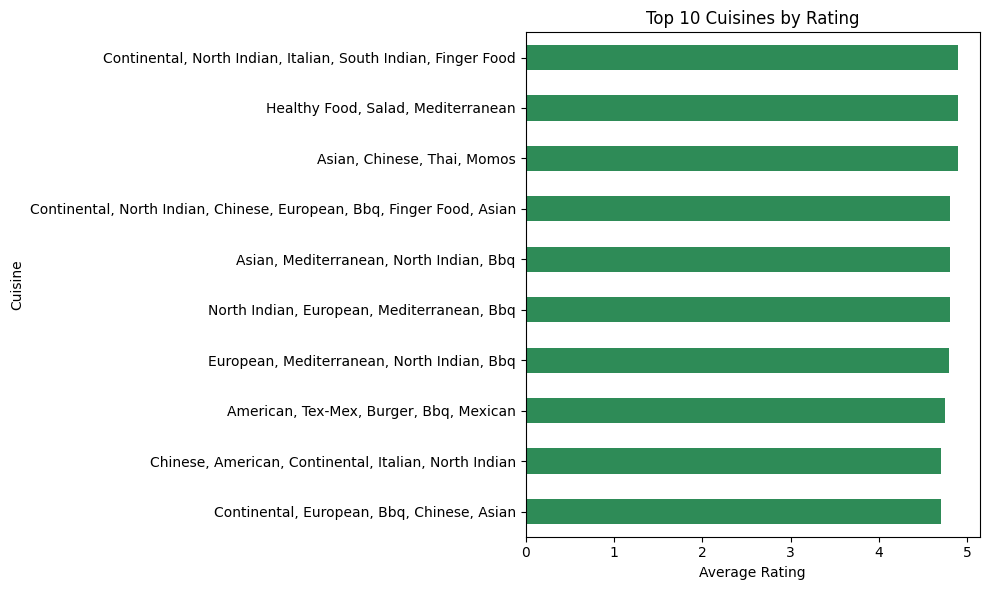


Top 10 Most Popular Cuisines:
                                                    avg_rating  total_votes  \
cuisines                                                                     
North Indian                                         3.587328       516306   
Pizza, Cafe, Italian                                 4.410588       347520   
Cafe, American, Burger, Steak                        4.595349       301059   
North Indian, Chinese                                3.412109       258225   
North Indian, Mughlai, South Indian, Chinese         4.094643       227930   
South Indian                                         3.630057       161645   
North Indian, Thai, Japanese, Continental, Cafe      4.688235       161365   
North Indian, European, Mediterranean                4.700000       136485   
North Indian, Continental, Chinese                   3.351220       122751   
North Indian, European, Mediterranean, Bbq, Kebab    4.492683       108425   

                               

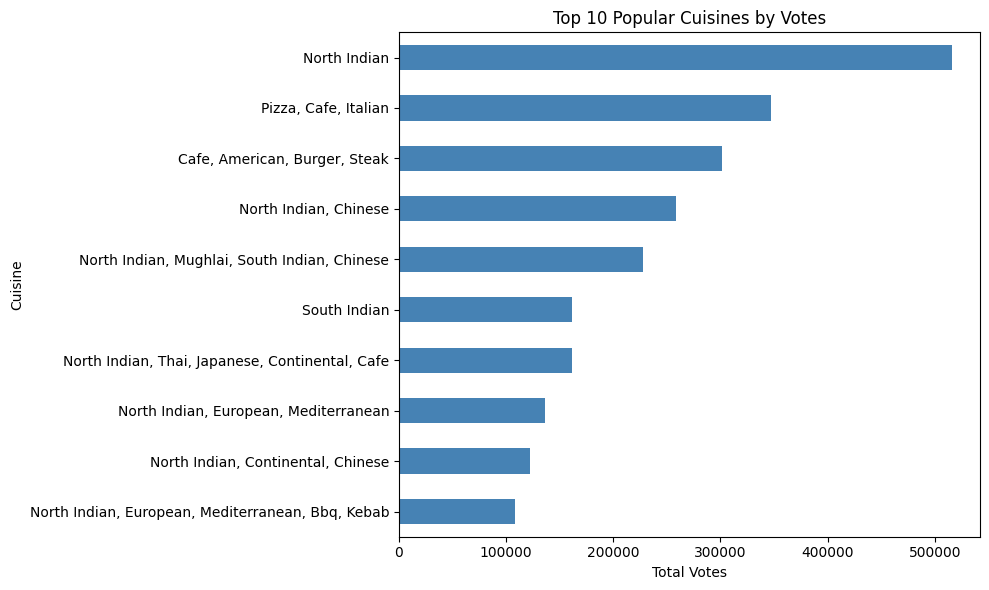


Top Rated Restaurants:
                                 name  \
3172     Byg Brewski Brewing Company   
4659          Belgian Waffle Factory   
3825     Byg Brewski Brewing Company   
4132          Belgian Waffle Factory   
3936     Byg Brewski Brewing Company   
6318                        Flechazo   
6585       AB's - Absolute Barbecues   
5774                    Punjab Grill   
5450                        Flechazo   
9138  Asia Kitchen By Mainland China   

                                               cuisines  rating  votes  \
3172  Continental, North Indian, Italian, South Indi...     4.9  16345   
4659                                           Desserts     4.9   1746   
3825  Continental, North Indian, Italian, South Indi...     4.9  16345   
4132                                           Desserts     4.9   1746   
3936  Continental, North Indian, Italian, South Indi...     4.9  16345   
6318            Asian, Mediterranean, North Indian, Bbq     4.9   2745   
6585         Eur

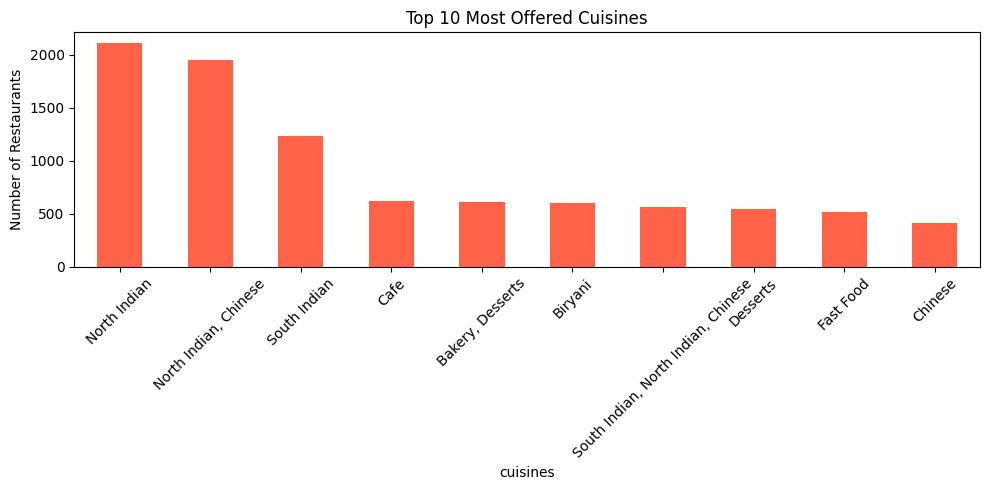

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Excel
zomato_df = pd.read_excel("data.xlsx", sheet_name="zomato")

# Remove duplicate entries
zomato_df.drop_duplicates(inplace=True)

# Standardize column names
zomato_df.columns = (
    zomato_df.columns.str.strip()
    .str.lower()
    .str.replace(r"[^\w\s]", "_", regex=True)
)
print("Updated column names:", zomato_df.columns.tolist())

# Rename the correct column (fixed)
zomato_df.rename(columns={"approx_cost_for two people_": "cost_for_two"}, inplace=True)

# Clean string columns
zomato_df['cuisines'] = zomato_df['cuisines'].str.strip().str.title()
zomato_df['location'] = zomato_df['location'].str.strip().str.title()

# Filter out invalid data
zomato_df = zomato_df[(zomato_df['rating'] > 0) & (zomato_df['cost_for_two'] > 0)]

# Convert data types
zomato_df = zomato_df.astype({
    'rating': 'float',
    'votes': 'int',
    'cost_for_two': 'int'
})

# Save cleaned dataset
zomato_df.to_csv("cleaned_zomato_data.csv", index=False)
print("Cleaned data saved to 'cleaned_zomato_data.csv'")

# Create a cuisine-wise summary
cuisine_stats = zomato_df.groupby("cuisines").agg(
    avg_rating=("rating", "mean"),
    total_votes=("votes", "sum"),
    avg_cost=("cost_for_two", "mean")
).sort_values(by="avg_rating", ascending=False)

# Top 10 cuisines by average rating
top_rated_cuisines = cuisine_stats.head(10)
print("\nTop 10 Highest Rated Cuisines:\n", top_rated_cuisines)

# Plotting top-rated cuisines
top_rated_cuisines['avg_rating'].plot.barh(
    color='seagreen', figsize=(10, 6), title="Top 10 Cuisines by Rating"
)
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 10 cuisines by popularity
top_voted_cuisines = cuisine_stats.sort_values(by="total_votes", ascending=False).head(10)
print("\nTop 10 Most Popular Cuisines:\n", top_voted_cuisines)

# Plotting popular cuisines
top_voted_cuisines['total_votes'].plot.barh(
    color='steelblue', figsize=(10, 6), title="Top 10 Popular Cuisines by Votes"
)
plt.xlabel("Total Votes")
plt.ylabel("Cuisine")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Highly rated restaurants
elite_restaurants = zomato_df[zomato_df['rating'] >= 4.8]
print("\nTop Rated Restaurants:\n", elite_restaurants.sort_values(by='rating', ascending=False).head(10)[['name', 'cuisines', 'rating', 'votes', 'location']])

# Most common cuisines
most_common_cuisines = zomato_df['cuisines'].value_counts().nlargest(10)
most_common_cuisines.plot.bar(
    color='tomato', title='Top 10 Most Offered Cuisines', figsize=(10, 5)
)
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
